In [20]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

In [23]:
import pandas as pd

In [30]:
Enviro_data = pd.read_csv(r'C:\Users\Tushar Atri\Desktop\Environmental Analytics\Crop_recommendation.csv')

In [32]:
#Reading the data and different variables present
Enviro_data.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [28]:
Enviro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [33]:
Enviro_data.describe(include=[object])

,Crop
count,2200
unique,22
top,rice
freq,100


In [37]:
Enviro_data['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [38]:
Enviro_data['Crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: Crop, dtype: int64

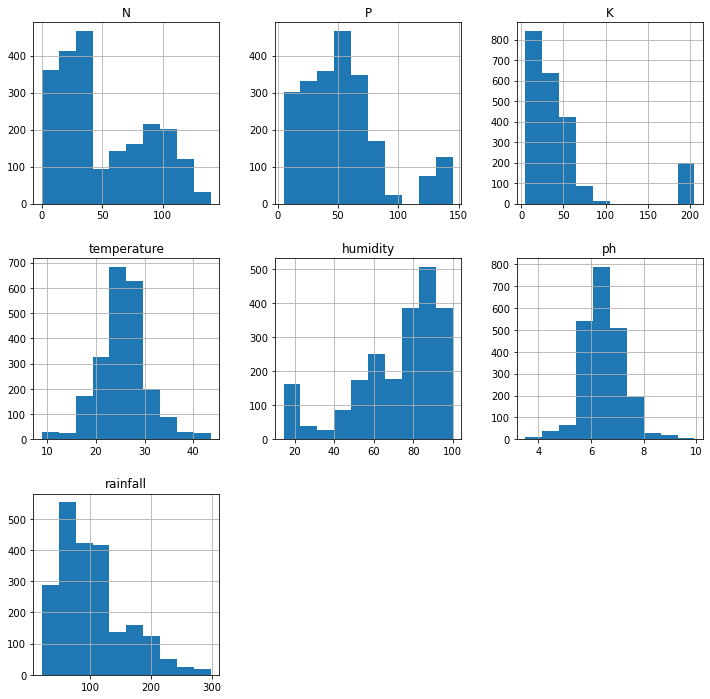

In [41]:
Enviro_data.hist(bins=10, figsize=(12,12))
plt.show()

In [48]:
print("Crops suitable for Winter")
print(Enviro_data[(Enviro_data['temperature'] < 20) & (Enviro_data['humidity'] > 30)]['Crop'].unique())
print("------------------------------------------------------------------------------")
print("Crops suitable for Summer")
print(Enviro_data[(Enviro_data['temperature'] > 30) & (Enviro_data['humidity'] > 50)]['Crop'].unique())
print("------------------------------------------------------------------------------")
print("Crops suitable for Rainy season")
print(Enviro_data[(Enviro_data['rainfall'] > 200) & (Enviro_data['humidity'] > 50)]['Crop'].unique())

Crops suitable for Winter
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
------------------------------------------------------------------------------
Crops suitable for Summer
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
------------------------------------------------------------------------------
Crops suitable for Rainy season
['rice' 'papaya' 'coconut']


In [107]:
features = Enviro_data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = Enviro_data['Crop']
labels = Enviro_data['Crop']

In [108]:
acc = []
model = []

In [109]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [125]:
from sklearn.linear_model import LogisticRegression

Model = LogisticRegression()

Model.fit(Xtrain,Ytrain)

predicted_values = Model.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

C:\Users\Tushar Atri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [139]:
#After putting in the different characterstics, We can predict the suitable crop
data = np.array([[9,21,32,32,53,5,95]])
prediction = Model.predict(data)
print(prediction)

['mango']
